In [1]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [2]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [5]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1875/1875 [==============================] - 10s 3ms/step - loss: 0.8367 - accuracy: 0.7282
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5356 - accuracy: 0.8182
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4849 - accuracy: 0.8320
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4595 - accuracy: 0.8409
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4428 - accuracy: 0.8454
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4296 - accuracy: 0.8512
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4200 - accuracy: 0.8531
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4115 - accuracy: 0.8570
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4045 - accuracy: 0.8597
Epoch 10/100
1875/1875 [==============================] - 10s 5ms/step -

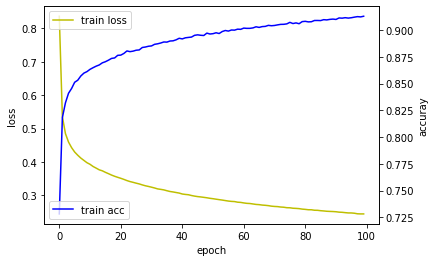

In [7]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [8]:
np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[100:]
Y_val = Y_train[100:]
X_train = X_train[:100]
Y_train = Y_train[:100]

X_train = X_train.reshape(100, 784).astype('float32') / 255.0
X_val = X_val.reshape(59900, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [9]:
# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [10]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=32, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [11]:
# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [12]:
# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 6s 2s/step - loss: 2.3999 - accuracy: 0.0400 - val_loss: 2.3542 - val_accuracy: 0.0776
Epoch 2/100
4/4 [==============================] - 5s 2s/step - loss: 2.2732 - accuracy: 0.1100 - val_loss: 2.3022 - val_accuracy: 0.1304
Epoch 3/100
4/4 [==============================] - 5s 2s/step - loss: 2.2050 - accuracy: 0.2300 - val_loss: 2.2741 - val_accuracy: 0.1774
Epoch 4/100
4/4 [==============================] - 3s 1s/step - loss: 2.1639 - accuracy: 0.3200 - val_loss: 2.2656 - val_accuracy: 0.2028
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 2.1100 - accuracy: 0.3100 - val_loss: 2.2101 - val_accuracy: 0.2361
Epoch 6/100
4/4 [==============================] - 5s 2s/step - loss: 2.0523 - accuracy: 0.3700 - val_loss: 2.1802 - val_accuracy: 0.2443
Epoch 7/100
4/4 [==============================] - 5s 2s/step - loss: 2.0063 - accuracy: 0.3500 - val_loss: 2.1550 - val_accuracy: 0.2651
Epoch 8/100
4/4 [=================

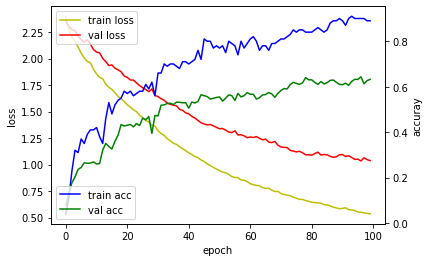

In [13]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 모델 추론 결과를 제출해서 점수를 확인해보자

아래 코드를 실행하면 시험셋의 X에 대한 모델 추론 결과를 파일로 저장할 수 있습니다. 이 파일에 대한 점수를 기록하고 싶다면, 아래 링크를 참고해주세요.

https://aifactory.space/class/2312/discussion/199

In [15]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('2312_y_pred.csv', y_pred, fmt='%d')

313/313 [==============================] - 2s 4ms/step
